Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [3]:
df = pd.read_csv("comment_final.csv", encoding="utf-8", index_col=0)

Check NAN


In [4]:
print('Data shape:', df.shape)
missing_val_num = df.isnull().sum()
missing_percent = (missing_val_num / df.shape[0]) * 100
missing_info = {'missing_values': missing_val_num,
                'missing_percent': round(missing_percent,3)}
missing_df = pd.DataFrame(missing_info)
missing_df

Data shape: (85999, 2)


,missing_values,missing_percent
processed_text,4849,5.638
class,0,0.000


In [5]:
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(81150, 2)
processed_text    0
class             0
dtype: int64


Duplicate Data


In [6]:
df[df.duplicated()]

,processed_text,class
365,không_bàn nội đọc đóng_gói cạn vận_chuyển đườn...,negative
465,đóng gói sơ_sài sách hộp cactong chống sốc sác...,positive
470,không_bàn nội đọc đóng_gói cạn vận_chuyển đườn...,negative
474,sách đợt dọn nhã nam đợt lắm rùi cười trading ...,positive
604,sách hàng sách yên_tâm,positive
...,...,...
85993,đóng gói đẹp,positive
85994,sách đẹp,positive
85996,sách đẹp,positive
85997,lắm,positive


In [7]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
print('Duplicate data:', df.duplicated().sum())
print(df.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

Duplicate data: 0
(66886, 2)


In [9]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)
x = tfidf_vectorizer.fit(df['processed_text'].values.astype('U'))
X = tfidf_vectorizer.transform(df['processed_text'].values.astype('U'))
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X_int = X.astype(int)


<66886x69 sparse matrix of type '<class 'numpy.int32'>'
	with 286249 stored elements in Compressed Sparse Row format>

In [10]:
df_new.head()

,bé,bìa,bìa sách,bọc,chất_lượng,chất_lượng sách,chống,chữ,cuộc_sống,câu,...,yêu,đóng,đóng gói,đóng_gói,đầu,đẹp,đọc,đọc sách,đổi,ổn
0,0.743634,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.362281,0.0,0.0,0.0,0.000000,0.0,0.175053,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.461931,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.213134,0.0,0.0,0.0
2,0.698354,0.158488,0.0,0.0,0.0,0.0,0.000000,0.0,0.24208,0.0,...,0.000000,0.0,0.0,0.0,0.210647,0.0,0.109596,0.0,0.0,0.0
3,0.383135,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.693400,0.0,0.180382,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.327222,0.0,0.0,0.0,0.000000,0.0,0.158112,0.0,0.0,0.0


In [12]:
y = df['class']

In [13]:
print(X_int.shape, y.shape)

(66886, 69) (66886,)


In [14]:
# Choose 0.3, 0.2 as the test size
test_size_list = [.3, .2]
# Run 5 times for each test_size
for test_size in test_size_list:
  print('Test size: ', test_size)
  accuracy_train_list = []
  accuracy_test_list = []
  for i in range(5):
    print('Run: ', i)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=test_size)
    # Create a LogisticReg (for faster training)
    clf = MultinomialNB()
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
  print('Test size: ', test_size, ' Train accuracy: ', sum(accuracy_train_list) / len(accuracy_train_list), ' Test accuracy: ',
      sum(accuracy_test_list) / len(accuracy_test_list))
  print('--------------------------------------------------')

Test size:  0.3
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.3  Train accuracy:  0.8583981204613413  Test accuracy:  0.8586165653343965
--------------------------------------------------
Test size:  0.2
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.2  Train accuracy:  0.8581483142707633  Test accuracy:  0.8596950216773808
--------------------------------------------------


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=42)

In [16]:
#naive bayes model
models = [MultinomialNB()]


In [17]:
def get_model_name(model):
    model_name = model.__class__.__name__
    if model_name == 'MultinomialNB':
        return model_name 

In [18]:
# Number of folds for cross validation
num_folds = 5
# A dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy Mean', 'Accuracy 3 * STD', 'Time'])
# Integrate through models
for model in models:
    # Get model name
    model_name = get_model_name(model)  
    print('Model: ', model_name, 'running...')
    # Get the current time
    start_time = datetime.now()  
    # Perform cross validation
    cv_results = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=-1)  
    # Get the training time
    train_time = datetime.now() - start_time  
    # Get the mean and std of the results
    mean_cv_results = cv_results.mean()
    std_cv_results = cv_results.std()  
    # Store the results
    results = results.append({'Model': model_name,
                                'Accuracy Mean': mean_cv_results,
                                'Accuracy 3 * STD': 3 * std_cv_results,
                                'Time': train_time
                                }, ignore_index=True)

Model:  MultinomialNB running...


C:\Users\marsen\AppData\Local\Temp\ipykernel_3936\427851155.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


In [19]:
# Sort the dataframe by Accuracy Mean in descending order
results = results.sort_values(by='Accuracy Mean', ascending=False).reset_index(drop=True)
results

,Model,Accuracy Mean,Accuracy 3 * STD,Time
0,MultinomialNB,0.85761,0.000101,0 days 00:00:02.854213


Tuning


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the range of hyperparameters to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}

# Create the MultinomialNB model
clf = MultinomialNB()

# Create a GridSearchCV object and fit it to the training data
search_clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
search_clf.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print('Best params:', search_clf.best_params_)
print('Best accuracy:', search_clf.best_score_)

# Create the best model with optimal parameters
best_alpha = search_clf.best_params_['alpha']
best_fit_prior = search_clf.best_params_['fit_prior']
best_model = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Best params: {'alpha': 5.0, 'fit_prior': True}
Best accuracy: 0.857628767589334
Test accuracy: 0.8617132605770669


In [21]:
accuracy_train = accuracy_score(y_train, best_model.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)
print('Train accuracy: ', accuracy_train, ' Test accuracy: ', accuracy_test)



Train accuracy:  0.8576287657920311  Test accuracy:  0.8617132605770669


c:\Users\marsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1039
     neutral       0.00      0.00      0.00       811
    positive       0.86      1.00      0.93     11528

    accuracy                           0.86     13378
   macro avg       0.29      0.33      0.31     13378
weighted avg       0.74      0.86      0.80     13378



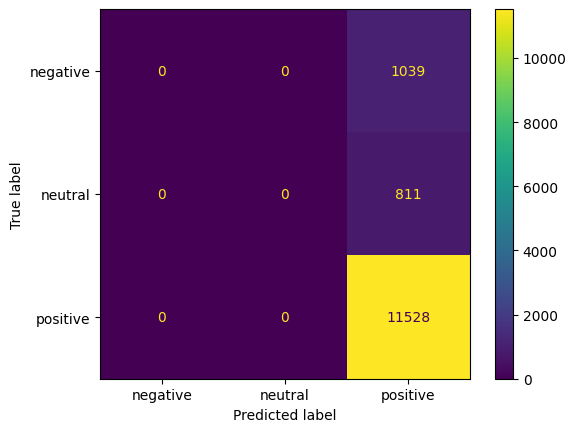

In [22]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);


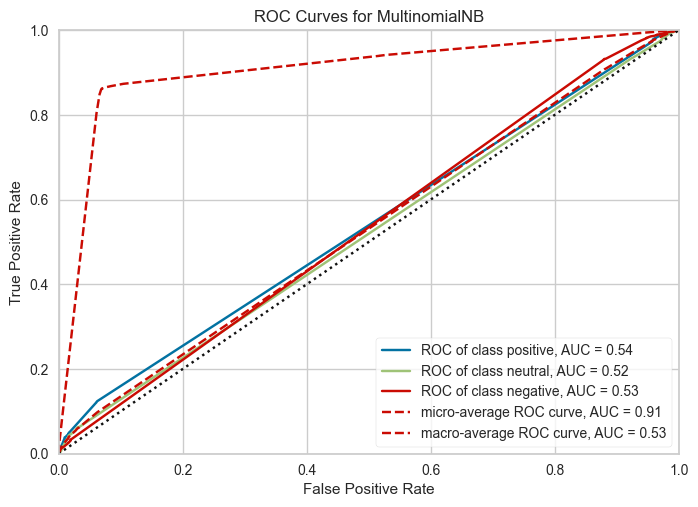

<AxesSubplot: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(MultinomialNB(), classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()